# X23 Group 4
## Project with Real Estate Dataset
### Christian Rodriguez, Emmanuel Salcedo, Ranjita Summan, Crystian Chavez


In [2]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
from scipy.stats import zscore
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score

# allow output to span multiple output lines in the console
pd.set_option('display.max_columns', 500)

Dataset Selection: We have chosen the USA Real Estate Dataset from Kaggle, which contains information about real estate properties in the USA.

https://www.kaggle.com/datasets/ahmedshahriarsakib/usa-real-estate-dataset?resource=download

Google Drive is mounted to colab and placed into path /content/drive/MyDrive/realtor-data.csv.

In [24]:
#Commented out since moving over to GitHub and using GitHub Desktop to continue work
#from google.colab import drive
#drive.mount('/content/drive')

Goal Definition: Goal is to build a system that predicts the cost of a home based on features such as footage, number of beds, and baths, on a per-state basis.

Feature Selection:In this case, the relevant features are "footage," "beds," and "baths." These features will be used to predict the cost of a home.

Preprocessing: Perform preprocessing steps on the dataset to prepare it for analysis. This may include handling missing values, encoding categorical variables, and scaling numerical features. Skipping this for now.

Exploration and Visualization: Here we are exploring the relationship between variables by using plots such as histograms, scatter plots, or box plots.

In [6]:
#modified so that I can read file from my desktop. Chris
#df = pd.read_csv('/content/drive/MyDrive/realtor-data.csv')
df = pd.read_csv(r'C:\Users\Crystian\Documents\GitHub\CST383\realtor-data.csv')

df.head(10)

,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price
0,for_sale,3.0,2.0,0.12,Adjuntas,Puerto Rico,601.0,920.0,NaN,105000.0
1,for_sale,4.0,2.0,0.08,Adjuntas,Puerto Rico,601.0,1527.0,NaN,80000.0
2,for_sale,2.0,1.0,0.15,Juana Diaz,Puerto Rico,795.0,748.0,NaN,67000.0
3,for_sale,4.0,2.0,0.10,Ponce,Puerto Rico,731.0,1800.0,NaN,145000.0
4,for_sale,6.0,2.0,0.05,Mayaguez,Puerto Rico,680.0,NaN,NaN,65000.0
5,for_sale,4.0,3.0,0.46,San Sebastian,Puerto Rico,612.0,2520.0,NaN,179000.0
6,for_sale,3.0,1.0,0.20,Ciales,Puerto Rico,639.0,2040.0,NaN,50000.0
7,for_sale,3.0,2.0,0.08,Ponce,Puerto Rico,731.0,1050.0,NaN,71600.0
8,for_sale,2.0,1.0,0.09,Ponce,Puerto Rico,730.0,1092.0,NaN,100000.0
9,for_sale,5.0,3.0,7.46,Las Marias,Puerto Rico,670.0,5403.0,NaN,300000.0


# New Section

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407890 entries, 0 to 407889
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   status          407890 non-null  object 
 1   bed             320108 non-null  float64
 2   bath            321618 non-null  float64
 3   acre_lot        331873 non-null  float64
 4   city            407838 non-null  object 
 5   state           407890 non-null  object 
 6   zip_code        407693 non-null  float64
 7   house_size      324365 non-null  float64
 8   prev_sold_date  140950 non-null  object 
 9   price           407890 non-null  float64
dtypes: float64(6), object(4)
memory usage: 31.1+ MB


In [8]:
df.describe()

,bed,bath,acre_lot,zip_code,house_size,price
count,320108.000000,321618.000000,331873.000000,407693.000000,3.243650e+05,4.078900e+05
mean,3.500200,2.566545,17.418487,3299.396838,2.222783e+03,6.758307e+05
std,2.320135,2.391618,931.723094,2222.641467,3.333098e+03,1.178266e+06
min,1.000000,1.000000,0.000000,601.000000,1.000000e+02,1.000000e+00
25%,2.000000,2.000000,0.200000,1890.000000,1.206000e+03,1.999000e+05
50%,3.000000,2.000000,0.560000,2822.000000,1.767000e+03,3.979000e+05
75%,4.000000,3.000000,2.200000,4630.000000,2.640000e+03,7.090000e+05
max,99.000000,198.000000,100000.000000,99999.000000,1.450112e+06,6.000000e+07


Running checks to see what columns have data missing and calculating the percentage in relation to total.


In [9]:
missing_total = df.isna().sum()
print("# of items missing from columns")
print(missing_total)
print(" ")
missing_total_per = df.isna().sum()*100/len(df)
print("Percentage of items missing from columns")
print(missing_total_per)

# of items missing from columns
status                 0
bed                87782
bath               86272
acre_lot           76017
city                  52
state                  0
zip_code             197
house_size         83525
prev_sold_date    266940
price                  0
dtype: int64
 
Percentage of items missing from columns
status             0.000000
bed               21.520998
bath              21.150800
acre_lot          18.636642
city               0.012749
state              0.000000
zip_code           0.048297
house_size        20.477335
prev_sold_date    65.444115
price              0.000000
dtype: float64


Looking at the number of missing data in columns, it would be best to clear our some rows that have important data missing like the number of beds, bath and house size.

In [10]:
df = df.dropna(subset=['bed', 'bath', 'house_size', 'zip_code'])

# Resetting the indices using df.reset_index()
df = df.reset_index(drop=True)

Now when we recheck the rows for NA data we see that bed, bath, and house size has changed to 0.

In [11]:
missing_total2 = df.isna().sum()
print("# of items missing from columns")
print(missing_total2)

# of items missing from columns
status                 0
bed                    0
bath                   0
acre_lot           73083
city                   1
state                  0
zip_code               0
house_size             0
prev_sold_date    183947
price                  0
dtype: int64


Creating a simple scatter plot to view how the number of beds relates to the cost of a home. (Price of home in scientific notation)

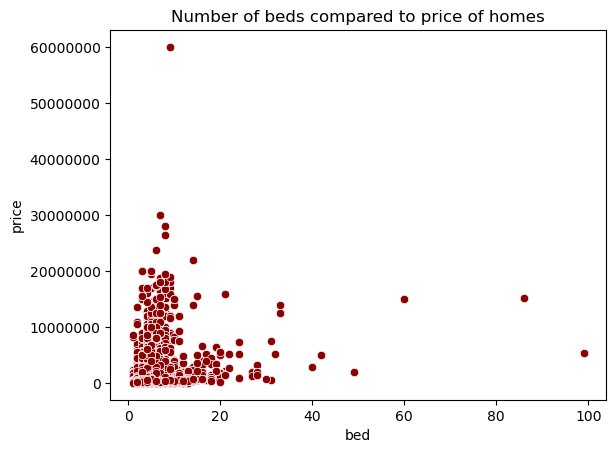

In [13]:
sns.scatterplot(data=df, x='bed', y='price', color='darkred')
plt.title("Number of beds compared to price of homes")
plt.ticklabel_format(style='plain')

Another scatterplot of number of baths related to price of home. (scientific notation)

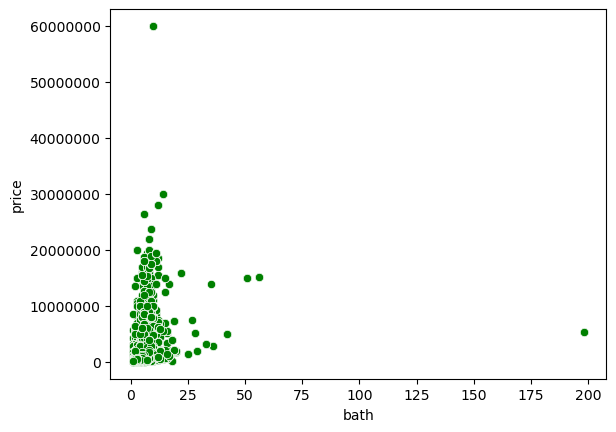

In [14]:
sns.scatterplot(data=df, x='bath', y='price', color='green')

Viewing the initial scatter plots we see that there is data outliers that is causing the plots to be skewed. Rather than going through and picking the top 75% of data points, we should modify the data to represent more modest number of the number of baths and the numbers of rooms a standard home would have. 

In [16]:
indexBed = df[(df['bed'] > 10)].index
df.drop(indexBed , inplace=True)

indexBath = df[(df['bath'] > 8)].index
df.drop(indexBath , inplace=True)

indexPrice = df[(df['price'] > 999999)].index
df.drop(indexPrice , inplace=True)

Here we changed the max number of beds we expect a home to have is 10 and the maxium number of bathrooms to 8. We also eliminated homes with a value of over 1 million because for the average middle class buyer, that price tag is out of reach.

Text(0.5, 0, 'Number of Beds and Baths')

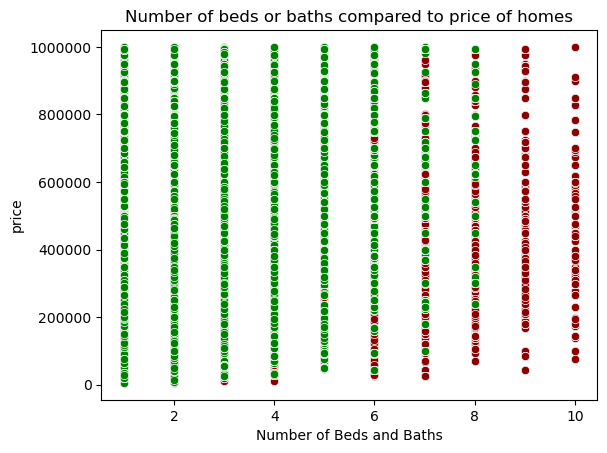

In [20]:
sns.scatterplot(data=df, x='bed', y='price', color='darkred')
sns.scatterplot(data=df, x='bath', y='price', color='green')
plt.title("Number of beds or baths compared to price of homes")
plt.ticklabel_format(style='plain')
plt.xlabel('Number of Beds and Baths')

Using seaborn count plot to see the number of homes for sale per state. As we found, some states do not have homes for sale but just land only.

Text(0.5, 1.0, 'Number of homes for sale by state')

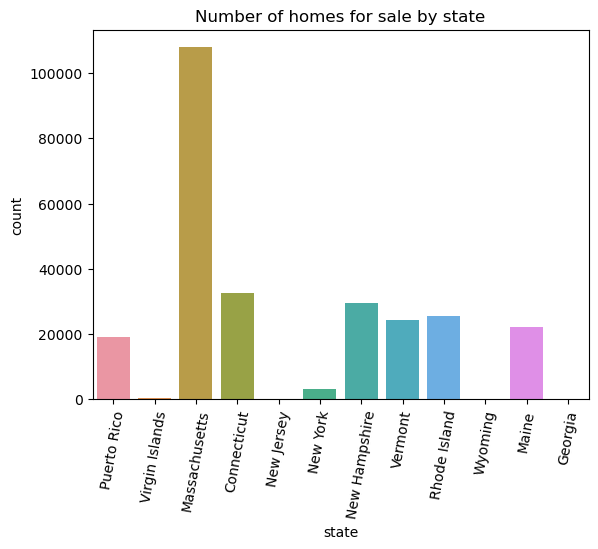

In [21]:
sns.countplot(data=df, x='state')
plt.xticks(rotation=80)
plt.title("Number of homes for sale by state")


Next we run our data through Linear Regression to see if we can find a pattern to help predict the value of a home based on the number of beds it has.

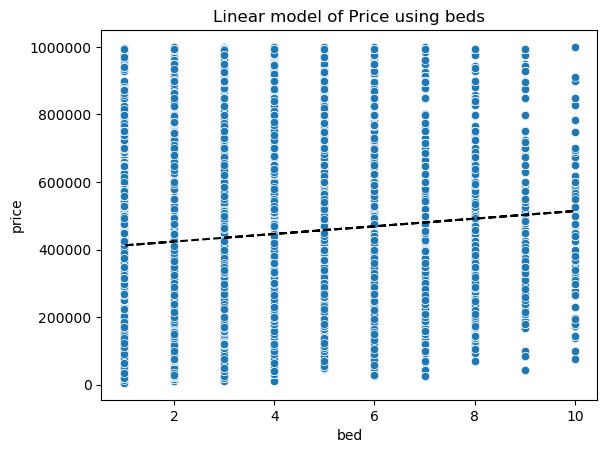

In [22]:
X = df[['bed']].values
y = df[['price']].values

reg = LinearRegression()
reg.fit(X,y)

sns.scatterplot(data=df, x='bed', y='price')
plt.title("Linear model of Price using beds")

plt.plot(X, reg.intercept_ + reg.coef_*X, linestyle='dashed', color='black')
plt.ticklabel_format(style='plain')

Looking at the dotted line, we do see a pattern where the number of beds shows a increase in home value. But because there is a wide range in price for the same number of beds, its not easy to provide a predictable value.

Let check the coefficient and r squared value to get a better idea of what the line is telling us.

In [27]:
print(f'intercept: {reg.intercept_[0]:.2f}')
print(f'coefficient for price: {reg.coef_[0]}')
print(f'r-squared value: {reg.score(X,y):.2f}')

intercept: 401245.26
coefficient for price: [11307.83415314]
r-squared value: 0.00


In [28]:
predictors = ['bed', 'bath']

X = df[predictors]
y = df['price']

reg2 = LinearRegression()
reg2.fit(X,y)

print(f'intercept: {reg2.intercept_:.2f}')
print('coefficients:')
for i, coef in enumerate(reg2.coef_):
    print(f' {predictors[i]}: {coef:.2f}')

intercept: 290364.02
coefficients:
 bed: -31057.80
 bath: 112282.24


In [31]:
matrix = pd.DataFrame({'bed': [3], 'bath': [3]})

results = reg2.predict(matrix)[0]
print(f'{results:.2f}')

534037.32


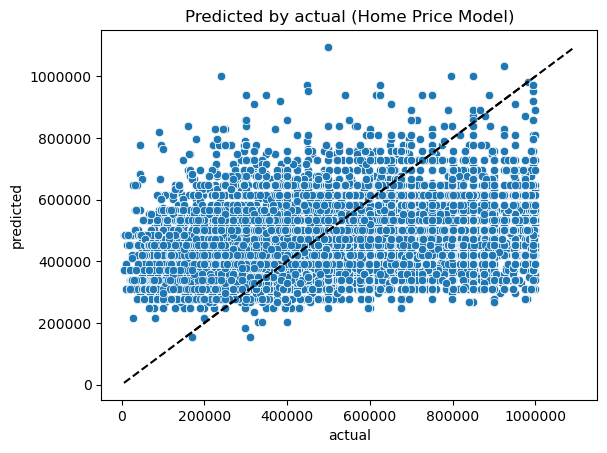

In [34]:
def plot_actual_predicted(actual, predicted, title):
    sns.scatterplot(x=actual, y=predicted)
    a = (np.min(actual),np.min(predicted))
    b = (np.max(actual),np.max(predicted))

    plt.plot((a,b), (a,b), linestyle='dashed', color='black')

    plt.title(title)
    plt.xlabel('actual')
    plt.ylabel('predicted')
    plt.ticklabel_format(style='plain')

plot_actual_predicted(y, reg2.predict(X), 'Predicted by actual (Home Price Model)')

We can see that when we compare our predicted model to the actual data, there is a large discrepnacy. The data seems to form a rectangle. The data points do not closely follow the line. 